<a href="https://colab.research.google.com/github/Henao/python-samples/blob/master/Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#

Feedback de Modelos

Cientos de modelos como la regresión o los arboles se dicen "interpretables". Esto quiere decir que los resultados de los modelos podemos sacar conclusiones o "insights".

Lasso es interpretable:


*   Miestras más grande el coeficiente para una feauture, más relevante es esta para la regresión
*   La regresión Lasso trata de seleccionar un pequeño número de features relevantes




In [11]:
import io
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)


In [13]:
from google.colab import files
uploaded = files.upload()

Saving x.csv to x.csv


In [63]:
import io
import pandas as pd
K = pd.read_csv(io.BytesIO(uploaded['x.csv'])).drop('worldwide_gross', axis=1)


In [64]:
K = K.drop('gross', axis=1)

Primero cargamos datos y luego entrenamos el modelo

In [65]:
from sklearn.linear_model import Lasso

In [66]:
model = Lasso()

In [67]:
from sklearn.model_selection import train_test_split
K_train, K_test, y_train, y_test = train_test_split(K,y)

In [68]:
K


,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


In [69]:
K_train

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
2315,15000000.0,1980.0,1.850000,109.0,2419.0,10000000.0,6.1
1937,20000000.0,2007.0,1.850000,105.0,2288.0,20000000.0,6.9
3834,1000000.0,2000.0,2.126976,100.0,2289.0,1000000.0,3.6
233,110000000.0,2011.0,2.350000,119.0,13391.0,120000000.0,5.8
1353,35000000.0,1997.0,2.350000,121.0,3125.0,35000000.0,6.4
...,...,...,...,...,...,...,...
2177,18000000.0,2013.0,2.350000,111.0,39307.0,18000000.0,6.9
193,125000000.0,2004.0,2.350000,124.0,20553.0,125000000.0,6.4
1952,20000000.0,2006.0,1.850000,85.0,6539.0,20000000.0,2.7
92,160000000.0,2007.0,1.850000,93.0,4705.0,160000000.0,6.1


In [74]:
len(K_train)/len(K)

0.75

In [79]:
model.fit(K_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Evaluamos el Score

In [80]:
model.score(K_test,y_test)

0.5652468844569908

In [81]:
model.coef_ 

array([ 3.03243339e+00, -8.60174040e+04, -9.32874808e+06, -2.38930663e+04,
        2.38507398e+02, -1.48136629e-02,  2.65650256e+07])

In [82]:
len(model.coef_)

7

Model.coef_ nos da los parametros de la regresión
entrega los parametros a multiplicar conlas features

In [83]:
np.log10(np.abs(model.coef_))

array([ 0.48179127,  4.93458633,  6.96982337,  4.37827189,  2.37750185,
       -1.82933754,  7.42431024])

In [85]:
var = np.floor(np.log10(np.abs(model.coef_)))

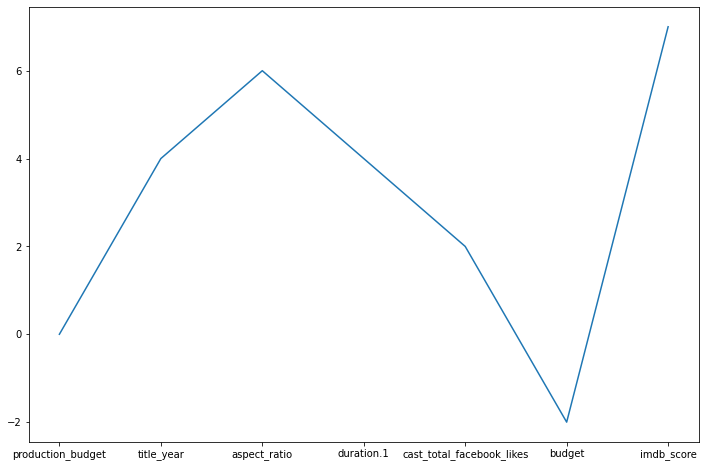

In [90]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7), list(K.columns));

**Correlación entre variables**


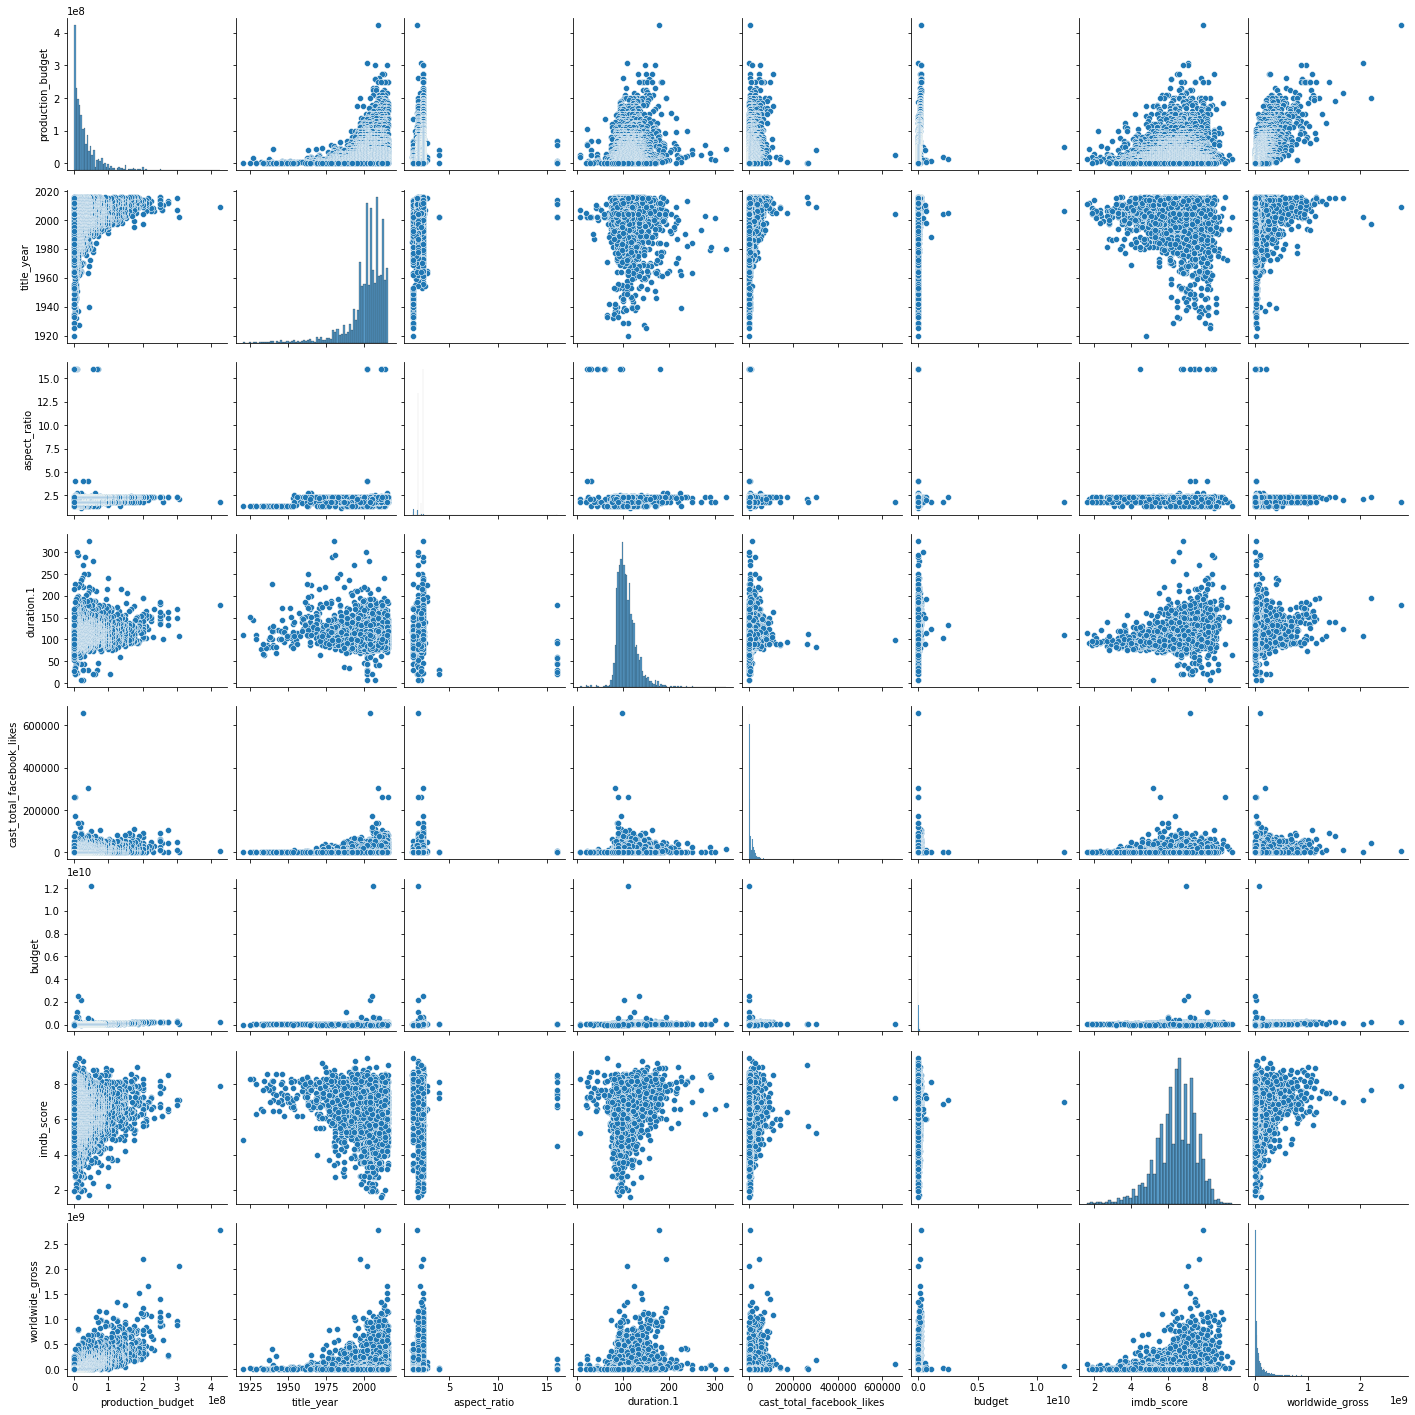

In [146]:
import seaborn as sns
z = pd.concat([K,y], axis=1)
sns.pairplot(z)

Cut
Toma el rango de valores que mi variable tiene y lo divide en 8 contenedores de tamaño similar
con cat manej e variable categoricas de padans, se refiere a que la variable puede tener un numero finito de valores y cda uno de esos valores en una categoria

In [95]:
pd.cut(K['production_budget'],8).cat.codes.rename('class')

0       7
1       5
2       5
3       5
4       5
       ..
4099    0
4100    0
4101    0
4102    0
4103    0
Name: class, Length: 4104, dtype: int8

In [102]:
clase = pd.cut(K['production_budget'],8).cat.codes.rename('class')
clase


0       7
1       5
2       5
3       5
4       5
       ..
4099    0
4100    0
4101    0
4102    0
4103    0
Name: class, Length: 4104, dtype: int8

In [109]:
pd.concat((K,clase), axis=1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,5
...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,0
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,0
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,0


La clase dice que tan costosa fue la pelicula

In [105]:
Z2 = pd.concat((K,clase), axis=1)

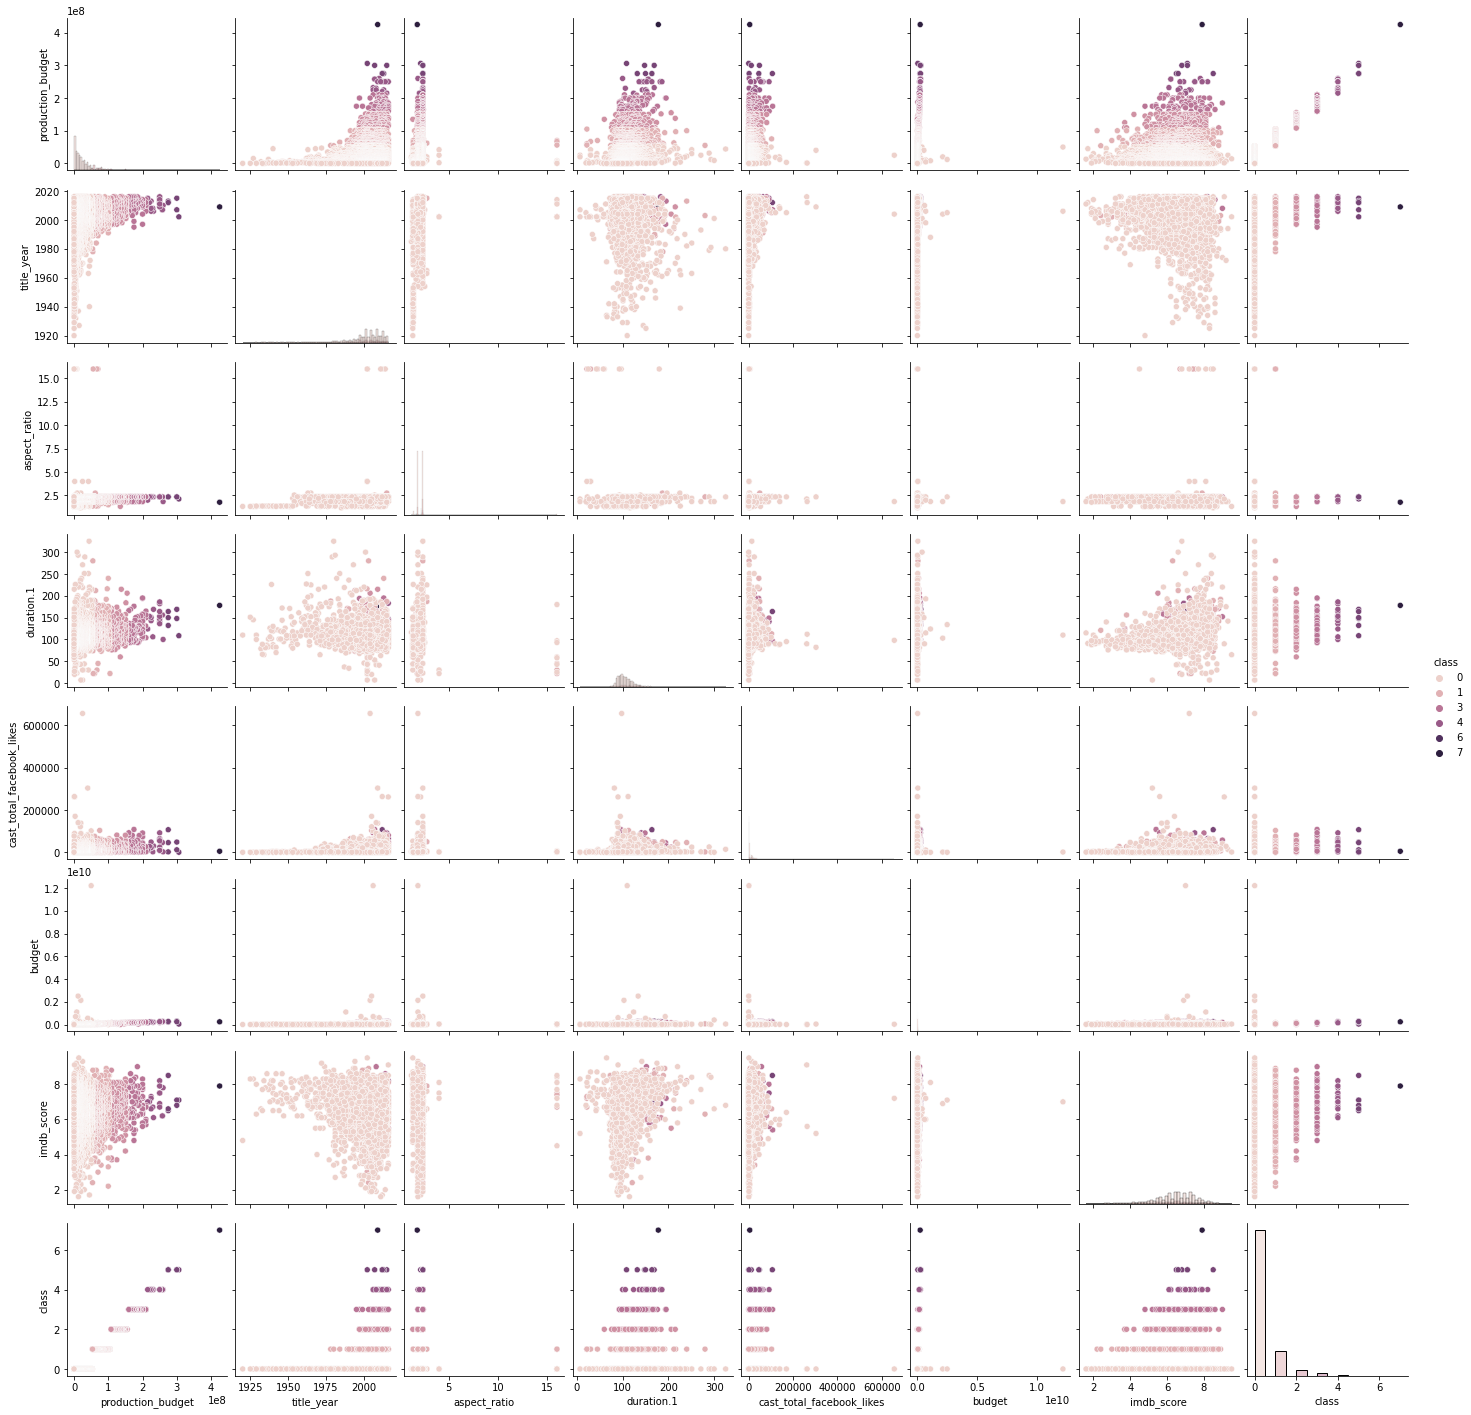

In [108]:
sns.pairplot(Z2 ,hue='class', vars=Z2.columns, diag_kind="hist")

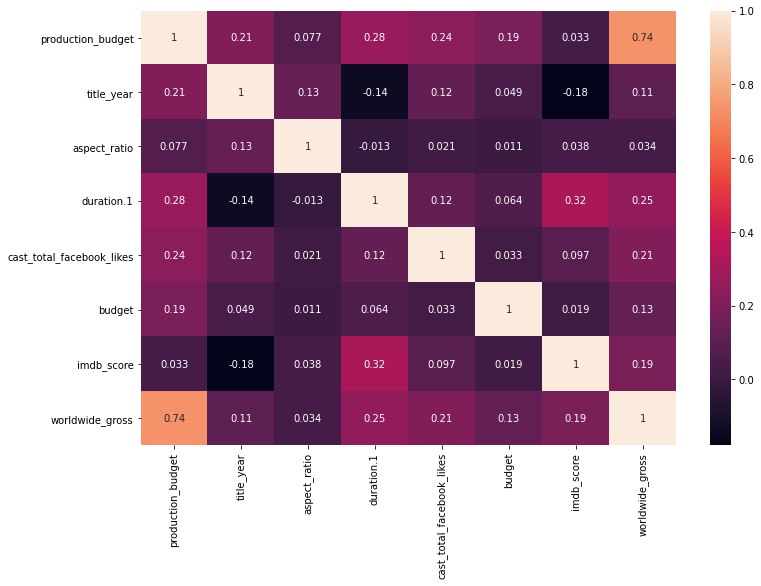

In [112]:
Z3 = pd.concat([K,y], axis=1)
sns.heatmap(Z3.corr(), annot=True)

Metodos de selección automatica de feature

In [131]:
from sklearn.feature_selection import SelectKBest # hace analisis univariado cada feature va a ser analizada y se va a tratar de ver que tanta información aporta y se elijen las k mejores
from sklearn.feature_selection import mutual_info_regression  # forma de calcular que tanta información aporta la feature. Metrica
#Chi2 sirve para una clasificación pero no para una regresión(estimador estadistico)

In [133]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_regression

In [138]:
selector = SelectKBest(mutual_info_regression, k=4)

In [140]:
selector.fit(K,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f5bd60c8400>)

In [148]:
scores = selector.scores_


scores

array([0.43197435, 0.0638488 , 0.07252334, 0.07136384, 0.11833152,
       0.37561896, 0.04817355])

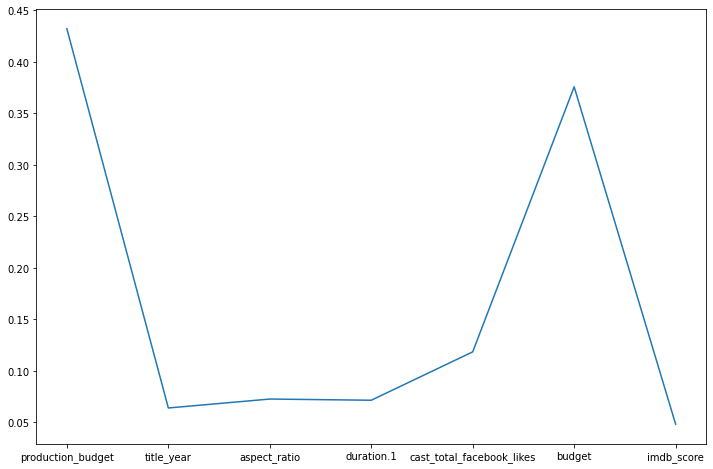

In [150]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns)); 

guardo las 5features entregadas por la interpretación de nuestra regresión lasso

In [154]:
K2 = K[['production_budget','title_year','duration.1', 'cast_total_facebook_likes', 'imdb_score']]
K3 = K[['production_budget','cast_total_facebook_likes','imdb_score']]

**Veamos los resultados del modelo con estas caracteristicas**

In [155]:
K_train, K_test, y_train, y_test = train_test_split(K,y)

In [157]:
cols2 = ['production_budget','title_year','duration.1', 'cast_total_facebook_likes', 'imdb_score']
K2_train, K2_test, y2_train, y2_test = K_train[cols2], K_test[cols2], y_train, y_test

cols3 = ['production_budget','title_year','duration.1', 'cast_total_facebook_likes', 'imdb_score']
K3_train, K3_test, y3_train, y3_test = K_train[cols3], K_test[cols3], y_train, y_test


In [159]:
from sklearn.linear_model import Lasso

In [160]:
len(K3_train)

3078

In [161]:
len(K2_train)

3078

In [162]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(K_train, y_train)
model2.fit(K2_train, y2_train)
model3.fit(K3_train, y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
print(model1.score(K_test, y_test))
print(model2.score(K2_test, y2_test))
print(model3.score(K3_test, y3_test))

0.478647111741641
0.4788182145368888
0.4788182145368888
